#1 data folder created
#2 csv files downloaded and renamed (gdp_percapita & internet_use).
#2 notebooks folder created / project name un_project

In [1]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#4	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
#4
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail(5))
print(gdp_df.info())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float6

#5 How many rows and columns are in `gdp_df`? What are the data types of each column?

7176 rows (if including header 0-7175), 4 columns, dtypes: float64(2), int64(1), object(1)

#6 Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [3]:
#6
print(gdp_df.drop('Value Footnotes', axis=1, inplace=True))

None


In [4]:
#6
gdp_df.rename({'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'GDP_Per_Capita'}, axis=1, inplace=True)
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


#7 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [25]:
#7
print(gdp_df.groupby(['Year'])[['Year']].count())
7#
print(gdp_df.groupby(['Country'])[['Country']].count() > 30)


      Year
Year      
1990   206
1991   207
1992   208
1993   209
1994   211
1995   222
1996   222
1997   226
1998   226
1999   227
2000   233
2001   234
2002   235
2003   235
2004   236
2005   236
2006   237
2007   237
2008   238
2009   239
2010   239
2011   240
2012   240
2013   242
2014   242
2015   242
2016   242
2017   242
2018   242
2019   241
2020   240
                             Country
Country                             
Afghanistan                    False
Africa Eastern and Southern     True
Africa Western and Central      True
Albania                         True
Algeria                         True
...                              ...
Vietnam                         True
West Bank and Gaza             False
World                           True
Zambia                          True
Zimbabwe                        True

[242 rows x 1 columns]


In [6]:
#7 ##Look at statement using operator for year & country both being true
print(gdp_df['Country'].nunique()) ##total unique countries in df

print((gdp_df.groupby(['Country'])[['Country']].count() == True).count()) ##incorrect
   

 

242
Country    242
dtype: int64


#8 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [10]:
#8 prep
print(gdp_df['GDP_Per_Capita'].max())

161971.46466102


In [44]:
#8 prep
# created a data frame named gdp_2020 filtered to results for 2020 (240 observations) 
#(link for helpto filter: https://sparkbyexamples.com/pandas/pandas-filter-rows-using-in-and-not-in-like-sql/)
gdp_2020 = gdp_df[gdp_df[['Year','GDP_Per_Capita']].isin([2020, ]).any(axis=1)]
print(gdp_2020)
print(gdp_2020['GDP_Per_Capita'].min())
print(gdp_2020['GDP_Per_Capita'].max())

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
50     Africa Western and Central  2020     4021.293919
81                        Albania  2020    13253.733337
112                       Algeria  2020    10735.382539
...                           ...   ...             ...
7025                      Vietnam  2020    10338.270543
7056           West Bank and Gaza  2020     5402.538773
7083                        World  2020    16269.969854
7114                       Zambia  2020     3277.816510
7145                     Zimbabwe  2020     2134.555461

[240 rows x 3 columns]
731.064073644609
112557.309471818


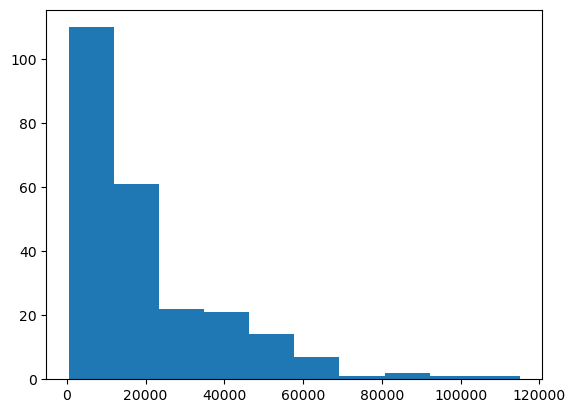

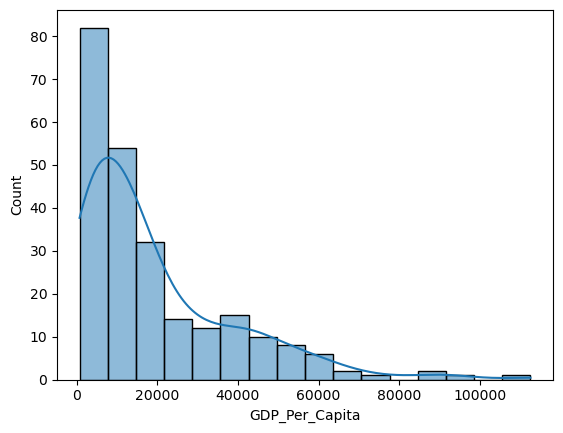

In [84]:
#8 histogram

#(link for help sns histogram: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751)
#(1st histogram based on datacamp notes / 2nd histogram using seaborn/sns....sns looks nicer)
plt.hist(gdp_2020.GDP_Per_Capita, range=(500, 115000)) 
plt.show()
sns.histplot(gdp_2020['GDP_Per_Capita'], kde=True)
plt.show()

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

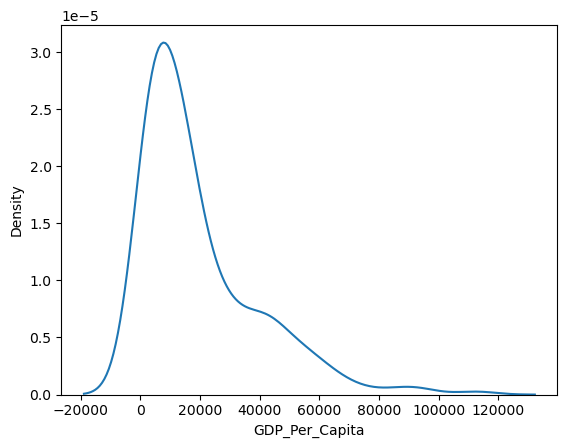

In [40]:
#8 density plot (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/density-plot/)
sns.kdeplot(gdp_2020['GDP_Per_Capita'])
plt.show()

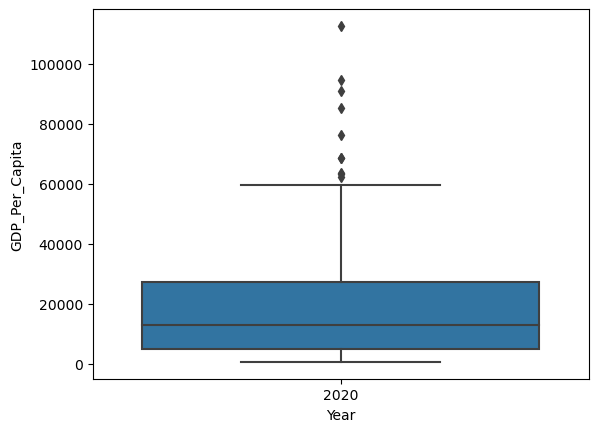

In [78]:
#8 box plot (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/boxplot/ )
sns.boxplot(x = gdp_2020['Year'], y = gdp_2020['GDP_Per_Capita'])
plt.show()

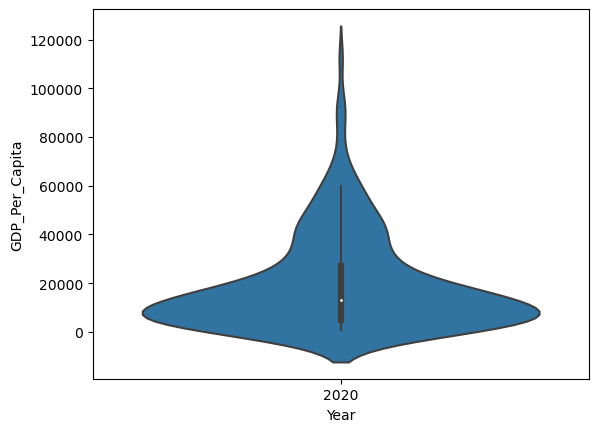

In [77]:
#8 violin plot (w/ seaborn)
# (Link for help: https://www.python-graph-gallery.com/violin-plot/ )
sns.violinplot(x = gdp_2020['Year'], y = gdp_2020['GDP_Per_Capita'])
plt.show()

#8 What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Discussion: All of the plots show the greatest distribution for countries on the lowest end of the GDP scale. The density plot is the clearest of the 4 charts for me to read and understand. The density plot shows negative GDPs and the highest GDPs in the clearest way...they are also visible in the violin chart.

#9 What was the median GDP per capita value in 2020?

In [48]:
#9 median gdp for 2020
print(gdp_2020['GDP_Per_Capita'].median())

12908.9374056206


#10  For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
    Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [54]:
#10 new data frame gdp_decades
## (Link for help: https://sparkbyexamples.com/pandas/pandas-filter-rows-using-in-and-not-in-like-sql/)
gdp_decades= gdp_df[gdp_df[['Year','GDP_Per_Capita']].isin([1990, 2000, 2010, 2020 ]).any(axis=1)]
print(gdp_decades)
##row count of 918 is correct for 4 years selected


                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
10                    Afghanistan  2010     1957.029070
19    Africa Eastern and Southern  2020     3491.978104
29    Africa Eastern and Southern  2010     3545.205203
39    Africa Eastern and Southern  2000     2915.472987
...                           ...   ...             ...
7144                       Zambia  1990     2190.181724
7145                     Zimbabwe  2020     2134.555461
7155                     Zimbabwe  2010     1813.531764
7165                     Zimbabwe  2000     2771.060576
7175                     Zimbabwe  1990     2652.129209

[918 rows x 3 columns]


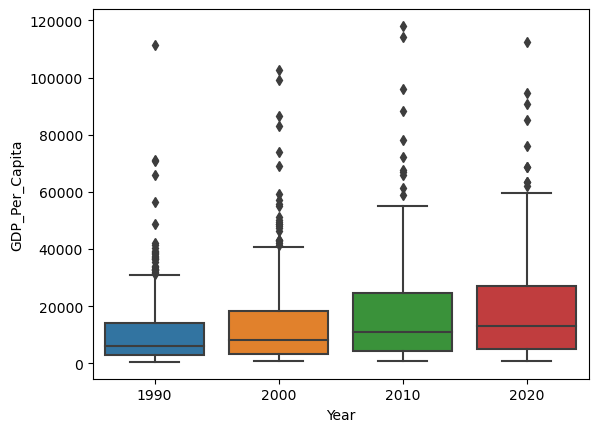

In [79]:
#10 box plot (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/boxplot/ )
sns.boxplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'])
plt.show()

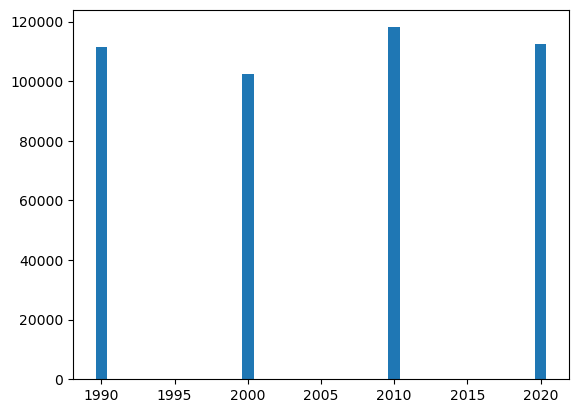

In [80]:
#10 bar plot (w/matplotlib)
# used datacamp notes
plt.bar(gdp_decades.Year, gdp_decades.GDP_Per_Capita)
plt.show()


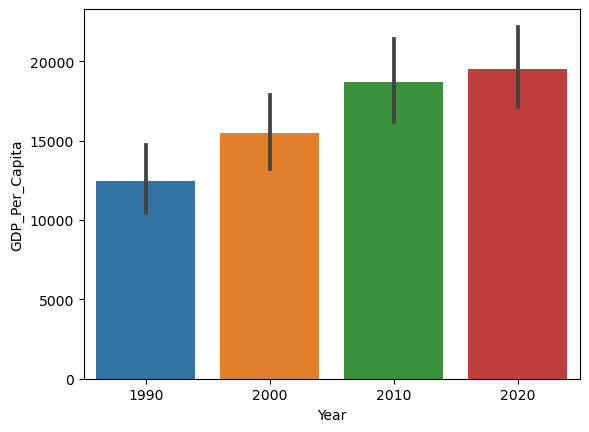

In [81]:
#10 bar plot (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/barplot/#Seaborn)
# note that the Seaborn alternative allows to write less code to build the chart, slighlty more limited in term of customization
sns.barplot(x=gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'])
plt.show()

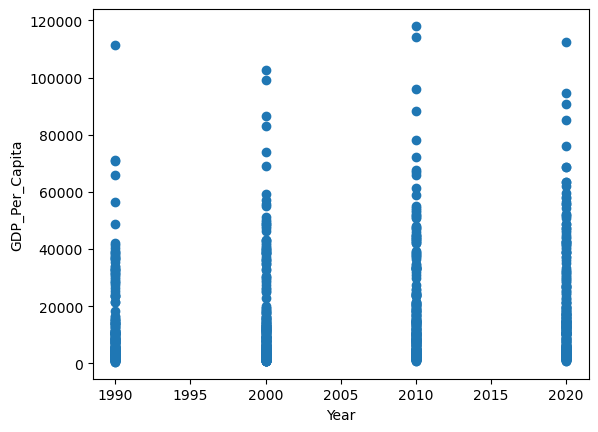

In [82]:
#10 scatter plot (w/ matplotlib)
# used datacamp notes
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.show()



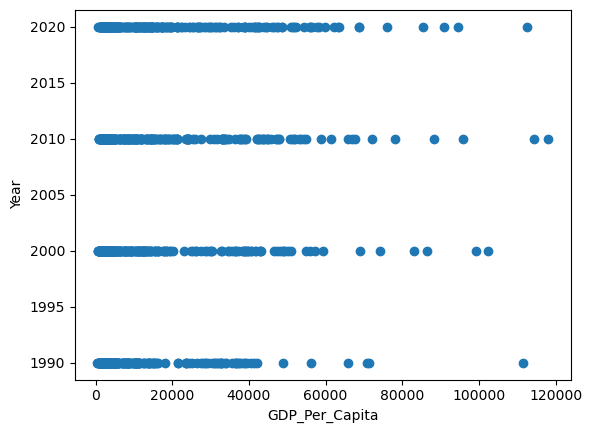

In [83]:
#10 scatter plot (w/ matplotlib)
# used datacamp notes / alt X & y axis
plt.scatter(gdp_decades.GDP_Per_Capita, gdp_decades.Year)
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Year')
plt.show()

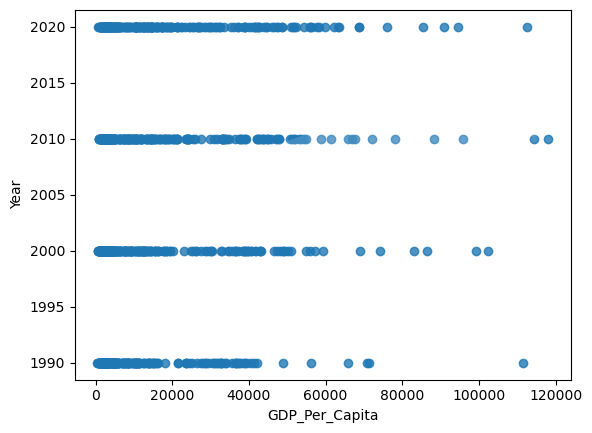

In [97]:
#10 scatter plot (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/scatter-plot/)
# (link for help: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
# trendline showed up w/o the line_kws info....adjusted settings to hide it
sns.regplot(x = gdp_decades['GDP_Per_Capita'], y = gdp_decades['Year'], line_kws={'color':'w', 'alpha':0.0, 'lw':0})
plt.show()

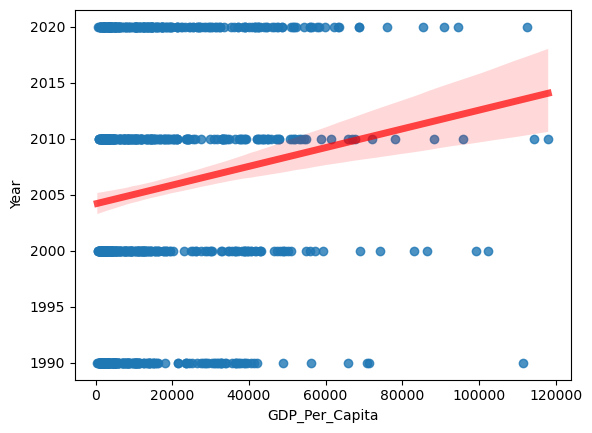

In [88]:
#10 scatter plot w/ trendline (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
sns.regplot(x = gdp_decades['GDP_Per_Capita'], y = gdp_decades['Year'], line_kws={'color':'r', 'alpha':0.7, 'lw':5})
plt.show()

#10 Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

Discussion: GDPs rose and steadily moved up across the decades. 

#11 Which country was the first to have a GDP per capita greater than $100,000?

In [105]:
#11 
gdp_1990 = gdp_df[gdp_df[['Year','GDP_Per_Capita']].isin([1990, ]).any(axis=1)]
print(gdp_1990)


                          Country  Year  GDP_Per_Capita
49    Africa Eastern and Southern  1990     3083.976800
80     Africa Western and Central  1990     2810.341129
111                       Albania  1990     4827.034551
142                       Algeria  1990     8746.340762
173                        Angola  1990     5758.950488
...                           ...   ...             ...
7024                      Vanuatu  1990     2855.554643
7055                      Vietnam  1990     2066.372215
7113                        World  1990     9704.621768
7144                       Zambia  1990     2190.181724
7175                     Zimbabwe  1990     2652.129209

[206 rows x 3 columns]


In [106]:
#11 using filtered data frame
gdp_1990[np.logical_and(gdp_1990['Year'] == 1990, gdp_1990['GDP_Per_Capita'] > 100000)]

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


In [109]:
#11 using the numpy 'logical_' removed the need to use a separate filtered data frame
gdp_df[np.logical_and(gdp_df['Year'] == 1990, gdp_df['GDP_Per_Capita'] > 100000)]

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


#12 Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [112]:
#12 
## thinking my way into the solution --- looking for something to cross reference
##gdp_2020[np.logical_and(gdp_2020['Year'] == 2020, gdp_2020['GDP_Per_Capita'].max())]
print(gdp_2020.GDP_Per_Capita.max())

112557.309471818


In [120]:
#12 filter for max gdp 2020
## i could not get this to work using just the gdp_df...it was able to isolate luxembourg when i referenced gdp_2020 data frame???
gdp_df[np.logical_and(gdp_df['Year'] == 2020, gdp_df['GDP_Per_Capita'] == gdp_2020.GDP_Per_Capita.max())]

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472


In [133]:
##12 filtering out just luxembourg
## help: datacamp intermediate python ch3 / filtering panda dataframes
gdp_lux = gdp_df['Country'] == 'Luxembourg'
print(gdp_lux)
print(gdp_df[gdp_lux])
gdp_lux_plot = gdp_df[gdp_lux]


0       False
1       False
2       False
3       False
4       False
        ...  
7171    False
7172    False
7173    False
7174    False
7175    False
Name: Country, Length: 7176, dtype: bool
         Country  Year  GDP_Per_Capita
3882  Luxembourg  2020   112557.309472
3883  Luxembourg  2019   116518.276815
3884  Luxembourg  2018   115049.926079
3885  Luxembourg  2017   114985.842236
3886  Luxembourg  2016   116283.699681
3887  Luxembourg  2015   113182.728563
3888  Luxembourg  2014   113313.578898
3889  Luxembourg  2013   113050.663254
3890  Luxembourg  2012   112137.135491
3891  Luxembourg  2011   112998.390477
3892  Luxembourg  2010   114343.988089
3893  Luxembourg  2009   112230.081410
3894  Luxembourg  2008   118154.667184
3895  Luxembourg  2007   120647.822959
3896  Luxembourg  2006   113346.035782
3897  Luxembourg  2005   108632.360016
3898  Luxembourg  2004   107634.837198
3899  Luxembourg  2003   104743.000088
3900  Luxembourg  2002   103317.331098
3901  Luxembourg  2001   

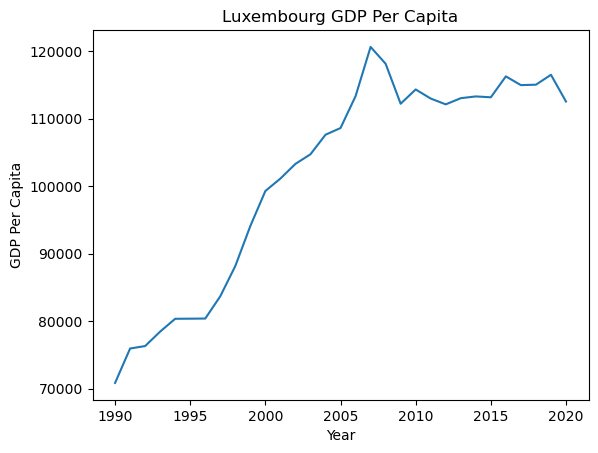

In [135]:
#12 line plot for luxembourg 1990-2020
## help: datacamp intro to data science in python
plt.plot(gdp_lux_plot.Year, gdp_lux_plot.GDP_Per_Capita)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Luxembourg GDP Per Capita')
plt.show()